* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()
    
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def frecuencias_abs(df):
    for catego in df:
        print(f"Para {catego}")
        print(df[catego].value_counts())
        print("\n"*3)
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"]= df_var["std"]/df_var["mean"]
    return df_var

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```python sns.load_dataset(<nombre_del_dataset)``` a una variable "df_titanic"

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [8]:
df=sns.load_dataset("titanic")
df_backuo = df.copy()
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [5]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
df.info()
#hay 4 columnas con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [10]:
valores_nulos=(df.isnull().sum() / len(df)) * 100
valores_nulos
df = df.drop("parch", axis =1)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [13]:
df = df.drop("deck", axis =1)
#la columna deck tiene un % de nulos muy alto por lo que la vamos a elimintar.
#la columna de edad tambien tiene un % alto pero esperaremos mas adelante a ver si se puede sacar alguna conclusion con ella.


KeyError: "['deck'] not found in axis"

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|survived|Se trata de la variable que mide si el pasaje sobrevivio al accidente|int64|0|Parece duplicada con columna alive||
|pclass|Se trata de la variable numerica que indica la clase en que viajaba el pasajero|int64|2|parece duplicada con columna class||
|sex|Se trata de la variable que mide el sexo del pasajero|object|1|parece duplicada con columna who||
|age|Se trata de la variable que mide la edad del pasajero|float64|1|||
|sibsp|variable numerica que indica la cantidad de familiares que viajan con el pasajero|int64|3|||
|fare|Se trata de la variable que mide el precio del boleto del pasajero|float64|-|no creo que el precio del boleto aporte mucha informacion||
|embarked|Se trata de la variable que proporciona la primera letra del puerto de embarque|object|-|No creo que el puerto de embarque tenga mucha relevancia||
|class|Se trata de la variable string que indica la clase en que viajaba el pasajero|category|2|||
|who|Se trata de la variable que indica si el pasajero es hombre o mujer|object|1|||
|adult_male|Se trata de la variable que indica si el pasajero era hombre adulto|bool|2|||
|embark_town|Se trata de la variable que indica la ciudad de embarque|object|-|||
|alive|Se trata de la variable que indica si el pasajero esta vivo|object|1|||
|alone|Se trata de la variable que indica si el pasajero viajaba solo|bool|3|||


### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [17]:
df["embarked"].value_counts()
dict_ciudades={ "S" : "Southhampton", "Q" : "Queenstown", "C" : "Cherbourg"}
df["embarked"] = df['embarked'].replace(dict_ciudades)
df.head(10)

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,Southhampton,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,Southhampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,Southhampton,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,Southhampton,Third,man,True,Southampton,no,True
5,0,3,male,NaN,0,8.4583,Queenstown,Third,man,True,Queenstown,no,True
6,0,1,male,54.0,0,51.8625,Southhampton,First,man,True,Southampton,no,True
7,0,3,male,2.0,3,21.0750,Southhampton,Third,child,False,Southampton,no,False
8,1,3,female,27.0,0,11.1333,Southhampton,Third,woman,False,Southampton,yes,False
9,1,2,female,14.0,1,30.0708,Cherbourg,Second,child,False,Cherbourg,yes,False


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [23]:
def frecuencias_abs(df):
    for catego in df:
        print(f"Para {catego}")
        print(df[catego].value_counts())
        print("\n"*3)


In [31]:
df2 = df.copy()
df2 = df.drop(columns = ["pclass", "sex", "sibsp", "class", "who", "adult_male", "embark_town", "alive"])
col_cat = [
    "survived",
    "embarked",
    "alone"
]
frecuencias_abs(df2[col_cat])
#incluire survived en ambas ya que es numerica pero parece mas categorica

Para survived
survived
0    549
1    342
Name: count, dtype: int64




Para embarked
embarked
Southhampton    644
Cherbourg       168
Queenstown       77
Name: count, dtype: int64




Para alone
alone
True     537
False    354
Name: count, dtype: int64






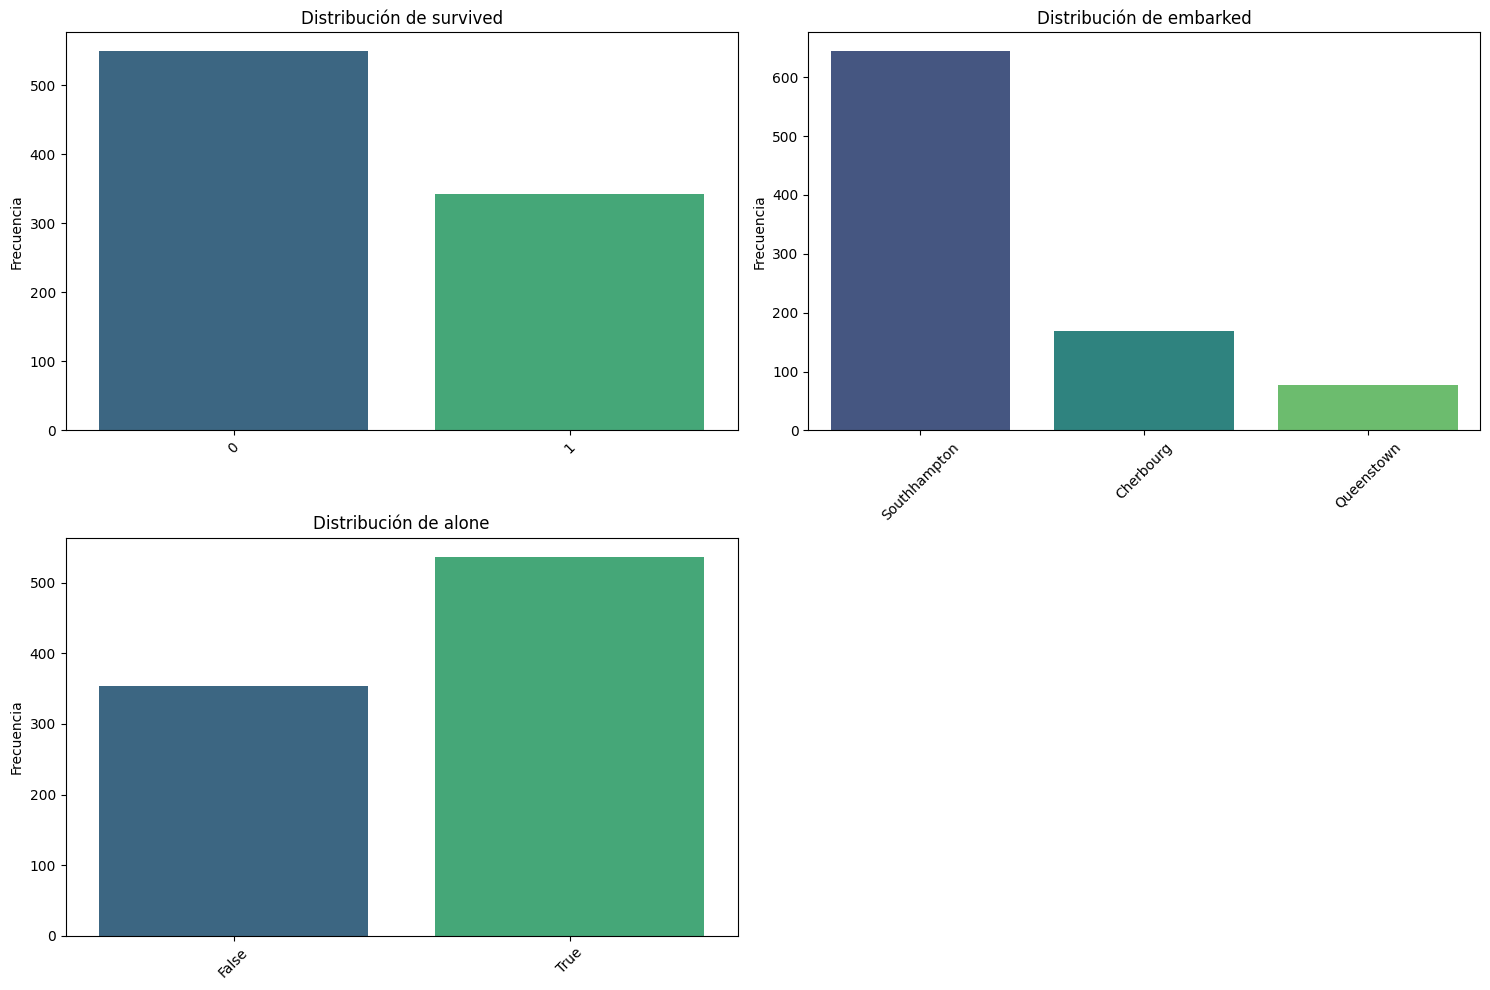

In [32]:
pinta_distribucion_categoricas(df2, col_cat)

In [ ]:
#la mayoria de los pasajeros fallecio
#la mayoria de los pasajeros embarco en southhampton
#la mayoria de los pasajeros viajo solo

### #2.2 Numéricas

In [20]:
col_num = df2.describe().T.index.to_list()
col_num

['survived', 'age', 'fare']

In [28]:
frecuencias_abs(df2[col_num])


Para survived
survived
0    549
1    342
Name: count, dtype: int64




Para age
age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64




Para fare
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64






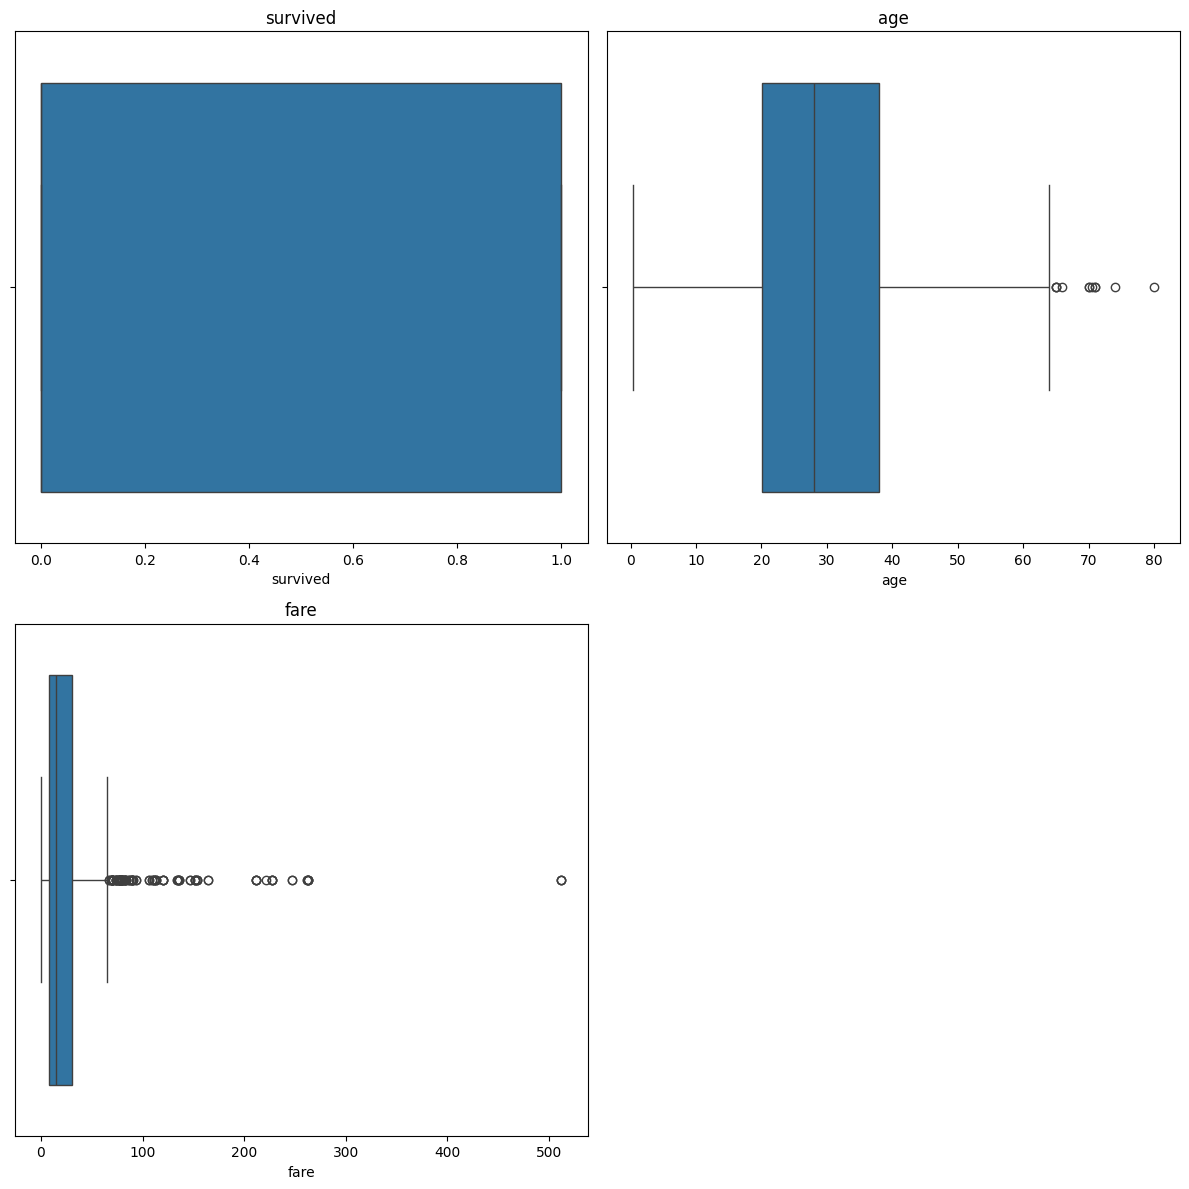

In [29]:
plot_multiple_boxplots(df2, col_num)

In [33]:
variabilidad(df2)

,std,mean,CV
survived,0.486592,0.383838,1.267701
age,14.526497,29.699118,0.489122
fare,49.693429,32.204208,1.543073


In [ ]:
#la mayoria de los pasajeros tienen entre 20 y 40 años
#el promedio del boleto fue de 32$